In [1]:
import os 
import subprocess as sp
import numpy as np
import pandas as pd
import glob 
import seaborn as sns 
import matplotlib.pyplot as plt 

pd.set_option('display.max_rows', 500)

os.chdir('/mnt/BioHome/jreyna/jreyna/projects/dchallenge/')

outdir = 'results/notebooks/eqtl_report/'
os.makedirs(outdir, exist_ok=True)

In [2]:
# load eqtl samplesheet
eqtl_samplesheet = pd.read_table('config/eqtl_samplesheets/eqtl.t1d_only.txt')
eqtl_samplesheet.loc[:, 'qarray_id'] = np.arange(2, eqtl_samplesheet.shape[0] + 2)

In [3]:
eqtl_samplesheet

,eqtl_db,eqtl_origin,qarray_id
0,BLUEPRINT,monocyte,2
1,BLUEPRINT,neutrophil,3
2,BLUEPRINT,T-cell,4
3,GENCORD,LCL,5
4,GENCORD,T-cell,6
5,GTEx,blood,7
6,GTEx,LCL,8
7,GTEx,pancreas,9
8,Lepik_2017,blood,10
9,Quach_2016,monocyte_IAV,11


## Number of eQTL before filtering (eQTL Catalog)

In [4]:
before_data = []
before_glob = 'results/main/eqtl/*/ge/*_ge_*.all.prefilter.num_eqtls.txt'
before_glob = glob.glob(before_glob)

In [5]:
before_data = []
for fn in before_glob:
    with open(fn) as fr:
        
        eqtl, ge = os.path.basename(fn).split('_ge_')
        ge = ge.split('.')[0]
        
        num_eqtls = int(fr.read().strip())
        
        before_data.append([eqtl, ge, num_eqtls])

In [6]:
before_df = pd.DataFrame(before_data)
before_df.columns = ['eqtl', 'ge', 'num_eqtls_pre']

## Number of eQTL post filtering (eQTL Catalog)

In [7]:
post_data = []
post_glob = 'results/main/eqtl/*/ge/*_ge_*.all.postfilter.num_eqtls.txt'
post_glob = glob.glob(post_glob)

In [8]:
post_data = []
for fn in post_glob:
    with open(fn) as fr:
        
        eqtl, ge = os.path.basename(fn).split('_ge_')
        ge = ge.split('.')[0]
        
        
        value = fr.read().strip()
        
        if value != '':
            num_eqtls = int(value)
        else:
            num_eqtls = 0        
        
        post_data.append([eqtl, ge, num_eqtls])

In [9]:
post_df = pd.DataFrame(post_data)
post_df.columns = ['eqtl', 'ge', 'num_eqtls_post']

In [10]:
post_df

,eqtl,ge,num_eqtls_post
0,GTEx,brain_hypothalamus,423929
1,GTEx,brain_putamen,559636
2,GTEx,artery_coronary,551959
3,GTEx,kidney_cortex,123311
4,GTEx,heart_left_ventricle,1091506
5,GTEx,esophagus_gej,1093510
6,GTEx,pancreas,1063897
7,GTEx,skin_not_sun_exposed,1664368
8,GTEx,pituitary,894226
9,GTEx,brain_anterior_cingulate_cortex,458124


## Compare the eQTL data  before and after FDR filtering

In [11]:
all_df = pd.merge(before_df, post_df, on=['eqtl', 'ge'], how='outer')
all_df['%Post'] = all_df['num_eqtls_post'] / all_df['num_eqtls_pre'] * 100

# adding the qsub array id 
all_df = all_df.merge(eqtl_samplesheet, left_on=['eqtl', 'ge'], right_on=['eqtl_db', 'eqtl_origin'])

In [12]:
pd.set_option('display.max_rows', 100) 
display(all_df)
pd.set_option('display.max_rows', 20) 

,eqtl,ge,num_eqtls_pre,num_eqtls_post,%Post,eqtl_db,eqtl_origin,qarray_id
0,GTEx,blood,117815659,1515737,1.286533,GTEx,blood,7
1,GTEx,LCL,134305450,431998,0.321653,GTEx,LCL,8
2,GTEx,pancreas,134927983,1063897,0.788492,GTEx,pancreas,9
3,Lepik_2017,blood,103124065,2946020,2.856773,Lepik_2017,blood,10
4,Quach_2016,monocyte_R848,168940282,1047996,0.620335,Quach_2016,monocyte_R848,15
5,Quach_2016,monocyte_Pam3CSK4,171429490,1177094,0.686634,Quach_2016,monocyte_Pam3CSK4,14
6,Quach_2016,monocyte_IAV,188522612,1049180,0.556527,Quach_2016,monocyte_IAV,11
7,Quach_2016,monocyte_naive,177145991,1293710,0.730307,Quach_2016,monocyte_naive,13
8,Quach_2016,monocyte_LPS,169199423,1101435,0.650969,Quach_2016,monocyte_LPS,12
9,BLUEPRINT,monocyte,107504217,2213353,2.058852,BLUEPRINT,monocyte,2


In [13]:
t1d_related = pd.read_table('config/eqtl_samplesheets/eqtl.samplesheet.tsv')
t1d_related_eqtls = [['BLUEPRINT', 'monocyte'],
     ['BLUEPRINT', 'neutrophil'],
     ['BLUEPRINT', 'T-cell'],
     ['GENCORD', 'LCL'],
     ['GENCORD', 'T-cell'],
     ['GTEx', 'blood'],
     ['GTEx', 'LCL'],
     ['GTEx', 'liver'],
     ['GTEx', 'pancreas'],
     ['Lepik_2017', 'blood'],
     ['Quach_2016', 'monocyte_IAV'],
     ['Quach_2016', 'monocyte_LPS'],
     ['Quach_2016', 'monocyte_naive'],
     ['Quach_2016', 'monocyte_Pam3CSK4'],
     ['Quach_2016', 'monocyte_R848'],
     ['Schmiedel_2018', 'B-cell_naive'],
     ['Schmiedel_2018', 'CD4_T-cell_anti-CD3-CD28'],
     ['Schmiedel_2018', 'CD4_T-cell_naive'],
     ['Schmiedel_2018', 'CD8_T-cell_anti-CD3-CD28'],
     ['Schmiedel_2018', 'CD8_T-cell_naive'],
     ['Schmiedel_2018', 'monocyte_CD16_naive'],
     ['Schmiedel_2018', 'monocyte_naive'],
     ['Schmiedel_2018', 'NK-cell_naive'],
     ['Schmiedel_2018', 'Tfh_memory'],
     ['Schmiedel_2018', 'Th1-17_memory'],
     ['Schmiedel_2018', 'Th17_memory'],
     ['Schmiedel_2018', 'Th1_memory'],
     ['Schmiedel_2018', 'Th2_memory'],
     ['Schmiedel_2018', 'Treg_memory'],
     ['Schmiedel_2018', 'Treg_naive'],
     ['van_de_Bunt_2015', 'pancreatic_islet'],
     ['ImmuNexUT', 'CD16p_Mono'],
     ['ImmuNexUT', 'CL_Mono'],
     ['ImmuNexUT', 'CM_CD8'],
     ['ImmuNexUT', 'DN_B'],
     ['ImmuNexUT', 'EM_CD8'],
     ['ImmuNexUT', 'Fr_II_eTreg'],
     ['ImmuNexUT', 'Fr_III_T'],
     ['ImmuNexUT', 'Fr_I_nTreg'],
     ['ImmuNexUT', 'Int_Mono'],
     ['ImmuNexUT', 'LDG'],
     ['ImmuNexUT', 'mDC'],
     ['ImmuNexUT', 'Mem_CD4'],
     ['ImmuNexUT', 'Mem_CD8'],
     ['ImmuNexUT', 'Naive_B'],
     ['ImmuNexUT', 'Naive_CD4'],
     ['ImmuNexUT', 'Naive_CD8'],
     ['ImmuNexUT', 'NC_Mono'],
     ['ImmuNexUT', 'Neu'],
     ['ImmuNexUT', 'NK'],
     ['ImmuNexUT', 'pDC'],
     ['ImmuNexUT', 'Plasmablast'],
     ['ImmuNexUT', 'SM_B'],
     ['ImmuNexUT', 'TEMRA_CD8'],
     ['ImmuNexUT', 'Tfh'],
     ['ImmuNexUT', 'Th17'],
     ['ImmuNexUT', 'Th1'],
     ['ImmuNexUT', 'Th2'],
     ['ImmuNexUT', 'USM_B']]

In [14]:
num_immunexut = len([x[0] for x in t1d_related_eqtls if x[0] == 'ImmuNexUT'])
curr_poss_eqtls = len(t1d_related_eqtls) - num_immunexut
print(curr_poss_eqtls)

31


In [15]:
bools = []
for sr in all_df.iloc[:, [0,1]].values:
    if sr.tolist() in t1d_related_eqtls:
        bools.append(True)
    else:
        bools.append(False)

In [16]:
all_df = all_df.loc[bools]

In [17]:
all_df.shape

(58, 8)

In [18]:
post_eqtl_means = all_df.num_eqtls_post.mean()
print('Mean number of significant eQTLs: {:.1f}'.format(post_eqtl_means))

Mean number of significant eQTLs: 1308540.4


In [19]:
all_df

,eqtl,ge,num_eqtls_pre,num_eqtls_post,%Post,eqtl_db,eqtl_origin,qarray_id
0,GTEx,blood,117815659,1515737,1.286533,GTEx,blood,7
1,GTEx,LCL,134305450,431998,0.321653,GTEx,LCL,8
2,GTEx,pancreas,134927983,1063897,0.788492,GTEx,pancreas,9
3,Lepik_2017,blood,103124065,2946020,2.856773,Lepik_2017,blood,10
4,Quach_2016,monocyte_R848,168940282,1047996,0.620335,Quach_2016,monocyte_R848,15
...,...,...,...,...,...,...,...,...
53,ImmuNexUT,CM_CD8,90962444,1173528,1.290124,ImmuNexUT,CM_CD8,34
54,ImmuNexUT,mDC,84779396,2060272,2.430156,ImmuNexUT,mDC,42
55,ImmuNexUT,NC_Mono,80626490,1587733,1.969245,ImmuNexUT,NC_Mono,48
56,ImmuNexUT,NK,88189090,1726682,1.957932,ImmuNexUT,NK,50


In [20]:
all_df.loc[(all_df.num_eqtls_pre == 0)].sort_values('qarray_id')

,eqtl,ge,num_eqtls_pre,num_eqtls_post,%Post,eqtl_db,eqtl_origin,qarray_id


In [21]:
np.sum(all_df.num_eqtls_pre == 0)

0

In [22]:
np.sum(all_df.num_eqtls_post == 0)

0

#### Summary of min and max 

In [23]:
all_df.iloc[all_df.num_eqtls_post.argmax()]

eqtl              Lepik_2017
ge                     blood
num_eqtls_pre      103124065
num_eqtls_post       2946020
%Post                2.85677
eqtl_db           Lepik_2017
eqtl_origin            blood
qarray_id                 10
Name: 3, dtype: object

In [24]:
all_df.iloc[all_df.num_eqtls_post.argmin()]

eqtl              van_de_Bunt_2015
ge                pancreatic_islet
num_eqtls_pre            180559672
num_eqtls_post              178434
%Post                    0.0988227
eqtl_db           van_de_Bunt_2015
eqtl_origin       pancreatic_islet
qarray_id                       31
Name: 29, dtype: object

## Visualize eQTL Results

In [25]:
eqtl_colors ={'BLUEPRINT': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
             'GENCORD': (1.0, 0.4980392156862745, 0.054901960784313725),
             'GTEx': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
             'ImmuNexUT': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
             'Lepik_2017': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
             'Quach_2016': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
             'Schmiedel_2018': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
             'van_de_Bunt_2015': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745)}

Text(0.5, 0, 'Count')

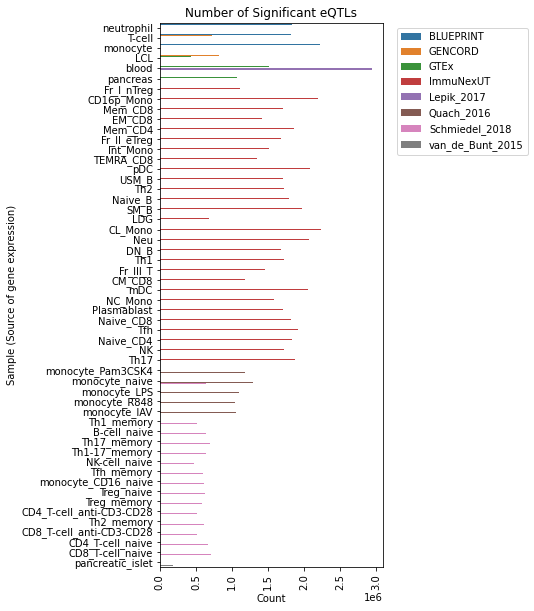

In [27]:
fig, ax = plt.subplots(figsize=(4, 10))

# Draw a nested barplot by species and sex
plot_data = all_df.sort_values('eqtl')

g = sns.barplot(data=plot_data,   
            y="ge", x="num_eqtls_post",
            hue='eqtl', palette=eqtl_colors, orient='h', ax=ax)

# move the legend
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")

for x in g.get_xticklabels():
    x.set_rotation(90)

g.set_title('Number of Significant eQTLs')
g.set_ylabel('Sample (Source of gene expression)')
g.set_xlabel('Count')

## Write the report

In [28]:
report_fn = os.path.join(outdir, 'eqtl_report.tsv')
all_df.to_csv(report_fn, sep='\t', index=False)

## Looking at significant eQTLs